In [12]:
import pandas as pd
import re

data_frame = pd.read_csv('data.csv')
data_frame.shape

(17943, 64)

In [13]:
data_frame.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating
count,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17929.000000,17943.000000,...,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000
mean,216447.995263,24.702057,66.331550,71.390793,1599.297665,1.107897,2.947277,2.368277,20.498355,49.874213,...,58.791339,47.262386,47.868082,45.820821,16.776737,16.532018,16.372959,16.539486,16.871816,65.771722
std,28988.660489,4.693238,6.879566,6.109331,276.606776,0.385554,0.664988,0.765885,16.532651,18.430707,...,11.577572,20.041492,21.638860,21.246583,17.903586,17.107419,16.718275,17.252367,18.212789,6.831813
min,16.000000,15.000000,48.000000,49.000000,718.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000
25%,201980.000000,21.000000,62.000000,67.000000,1459.000000,1.000000,3.000000,2.000000,9.000000,38.000000,...,52.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,61.000000
50%,223676.000000,24.000000,66.000000,71.000000,1639.000000,1.000000,3.000000,2.000000,18.000000,54.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,66.000000
75%,238359.500000,28.000000,71.000000,75.000000,1790.000000,1.000000,3.000000,3.000000,28.000000,64.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,70.000000
max,253155.000000,45.000000,94.000000,95.000000,2349.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,91.000000,93.000000,94.000000


In [14]:
data_frame.values

array([[176580, ' L. Suárez', 31, ..., 'ST', 87.0, '€164M'],
       [194765, ' A. Griezmann', 27, ..., 'LW', 87.0, '€145.6M'],
       [177003, ' L. Modrić', 32, ..., 'CM', 88.0, '€137.4M'],
       ...,
       [233215, ' C. Addai', 20, ..., 'GK', 50.0, '€98K'],
       [246648, ' O. Battersby', 16, ..., 'GK', 49.0, '€138K'],
       [248182, ' H. Sveijer', 16, ..., 'GK', 47.0, '€94K']], dtype=object)

In [15]:
data_frame[data_frame["Age"]>40].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
2953,208927,H. Sulaimani,41,https://cdn.sofifa.com/players/208/927/19_60.png,Saudi Arabia,https://cdn.sofifa.com/flags/sa.png,64,64,Al Ahli,https://cdn.sofifa.com/teams/112387/light_30.png,...,66.0,63.0,15.0,8.0,15.0,14.0,13.0,CDM,67.0,NaN
15767,140029,O. Pérez,45,https://cdn.sofifa.com/players/140/029/19_60.png,Mexico,https://cdn.sofifa.com/flags/mx.png,71,71,Pachuca,https://cdn.sofifa.com/teams/110147/light_30.png,...,12.0,11.0,70.0,64.0,65.0,73.0,74.0,GK,70.0,€272K
15977,142998,C. Muñoz,41,https://cdn.sofifa.com/players/142/998/19_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,64,64,CD Universidad de Concepción,https://cdn.sofifa.com/teams/112534/light_30.png,...,14.0,19.0,64.0,63.0,66.0,64.0,61.0,GK,63.0,€41K
16209,156092,J. Villar,41,https://cdn.sofifa.com/players/156/092/19_60.png,Paraguay,https://cdn.sofifa.com/flags/py.png,77,77,NaN,https://cdn.sofifa.com/flags/py.png,...,13.0,14.0,75.0,75.0,74.0,78.0,77.0,GK,76.0,NaN
17061,18745,M. Tyler,41,https://cdn.sofifa.com/players/018/745/19_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,59,59,Peterborough United,https://cdn.sofifa.com/teams/1938/light_30.png,...,16.0,17.0,61.0,54.0,54.0,63.0,55.0,GK,58.0,€18K


<Axes: >

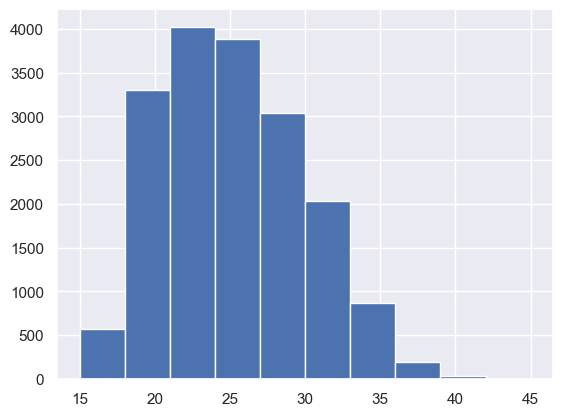

In [16]:
data_frame["Age"].hist()

In [17]:
data_frame["Name"].head()

0        L. Suárez
1     A. Griezmann
2        L. Modrić
3         M. Acuña
4     K. De Bruyne
Name: Name, dtype: object

In [18]:
df1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])

def convert_monetary_value(value):
    match = re.match(r'\€([0-9.]+)([KM]?)', value)
    if match:
        numeric_value = float(match.group(1))
        scale = match.group(2)
        if scale == 'K':
            return int(numeric_value * 1000)
        elif scale == 'M':
            return int(numeric_value * 1000000)
        else:
            return int(numeric_value)
    return None

value = df1['Value']
value = value.apply(convert_monetary_value)
wage = df1['Wage']
wage = wage.apply(convert_monetary_value)
df1['difference'] = value - wage
df1.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
22,L. Messi,€575K,€110.5M,109925000
88,Neymar Jr,€300K,€108M,107700000
53,H. Kane,€200K,€96.5M,96300000
105,E. Hazard,€325K,€93M,92675000
4,K. De Bruyne,€350K,€93M,92650000
...,...,...,...,...
5678,N. Bancu,€0,€0,0
13375,F. Kippe,€1K,€0,-1000
12670,Zhou Ting,€2K,€1K,-1000
2953,H. Sulaimani,€5K,€0,-5000


<Axes: xlabel='Wage', ylabel='Value'>

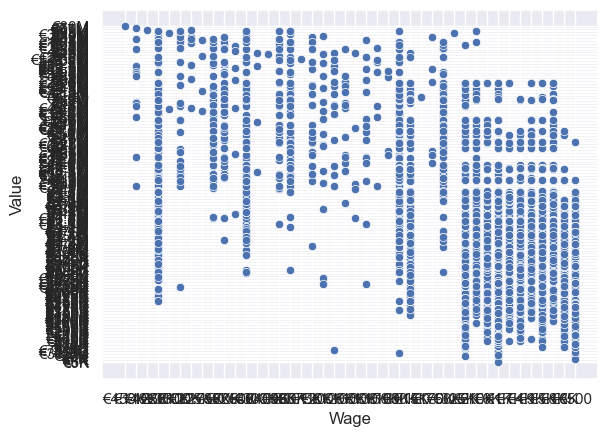

In [53]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [52]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")]
)

p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value', width=700, height=700, tools=[TOOLTIPS])
p.circle(wage, value, size=10)
show(p)